# **ON THIN AIR: UNDERSTANDING AVIATION RISKS THROUGH DATA ANALYSIS**

# *Introduction*

 In pursuit of expanding into new industries with the aim of diversifying the company's portfolio, our company sets on venturing into the aviation industry. This therefore creates a need for understanding and mitigating potential risks. The goal is to provide insights from data analysis techniques so as to to empower our company to make informed decisions on before venturing into aviation. This analysis will help inform the company's strategy for entering the new market.

## Objectives

1. Conduct an analysis of aviation accident data from the National Transportation Safety Board.
2. Identify trends and patterns on the data in order to assess risk factors associated with different aircrafts.
3. Generate recommendations that will aid in decision-making on which aircraft to purchase for both commercial and private enterprises

## Data Understanding

The data for this analysis is from the National Transportation Safety Boardthatincludes aviation accident data from 1962-2023 about civil aviation 
accidents and selected incidents in the United States and international waters. It is an independent federal agency charged by congress with investigating every civil aviation accident in the US and significant events in other modes of transport.
the data is contained in two seperate csv files:

1.[AviationData.csv](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses?select=AviationData.csv): each record represents an event with 31 attributes:

'Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description','Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries','Total.Serious.Injuries', 'Total.Minor.Injuriries','Total.Uninjured','Weather.Condition', 'Broad.phase.of.flight', 'Report.Status' and'Publication.Date'

2.[USState_Codes.csv](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses?select=USState_Codes.csv); contains:

'Name of the state' and 'The state abbreviation'

## Loading data

In [104]:
#Importing libraries needed
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Ensure plots remain within the notebook
%matplotlib inline

## Exracting columns relevant to this Analysis

According to my objectives, most relevant columns to my analysis are:

Event.Date: To analyze trends over time and identify patterns in accident frequency.

Location: To assess geographical patterns and identify regions with higher accident rates.

Make and Model: Essential for identifying specific aircraft involved in accidents and assessing their safety records.

Injury.Severity: To understand the severity of injuries resulting from accidents and assess overall safety.

Aircraft.damage: To evaluate the extent of damage to aircraft and assess safety features.

Number.of.Engines: Important for evaluating aircraft reliability and performance.

Weather.Condition: To analyze the impact of weather conditions on accidents and identify weather-related risk factors.

Purpose.of.flight: To understand the context of flights (e.g., commercial, private, training) and assess associated risks.

Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured: Crucial for understanding the human impact of accidents and assessing overall safety.

Report.Status: To assess the completeness and reliability of accident reports and investigations.

In [105]:
# List of selected columns
selected_columns = ['Event.Date', 'Location', 'Make', 'Model', 'Injury.Severity', 
                    'Aircraft.damage', 'Number.of.Engines', 'Weather.Condition', 
                    'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 
                    'Total.Minor.Injuries', 'Total.Uninjured', 'Report.Status']

# Read the CSV file with only the selected columns
aviation_data = pd.read_csv('AviationData.csv.zip', usecols=selected_columns, encoding='latin1')

# Display the first few rows of the DataFrame
print(aviation_data.head())


   Event.Date         Location Injury.Severity Aircraft.damage      Make  \
0  1948-10-24  MOOSE CREEK, ID        Fatal(2)       Destroyed   Stinson   
1  1962-07-19   BRIDGEPORT, CA        Fatal(4)       Destroyed     Piper   
2  1974-08-30    Saltville, VA        Fatal(3)       Destroyed    Cessna   
3  1977-06-19       EUREKA, CA        Fatal(2)       Destroyed  Rockwell   
4  1979-08-02       Canton, OH        Fatal(1)       Destroyed    Cessna   

      Model  Number.of.Engines Purpose.of.flight  Total.Fatal.Injuries  \
0     108-3                1.0          Personal                   2.0   
1  PA24-180                1.0          Personal                   4.0   
2      172M                1.0          Personal                   3.0   
3       112                1.0          Personal                   2.0   
4       501                NaN          Personal                   1.0   

   Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  \
0                     0.0     

In [106]:
#For the USState codes
us_state_codes = pd.read_csv('USState_Codes.csv', encoding='latin1')
us_state_codes.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


## Data Wrangling

### Completeness

#### 1.Exploration of data

In [107]:
num_rows = len(aviation_data)
print("Number of rows:", num_rows)

Number of rows: 88889


In [108]:
aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [109]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Location                88837 non-null  object 
 2   Injury.Severity         87889 non-null  object 
 3   Aircraft.damage         85695 non-null  object 
 4   Make                    88826 non-null  object 
 5   Model                   88797 non-null  object 
 6   Number.of.Engines       82805 non-null  float64
 7   Purpose.of.flight       82697 non-null  object 
 8   Total.Fatal.Injuries    77488 non-null  float64
 9   Total.Serious.Injuries  76379 non-null  float64
 10  Total.Minor.Injuries    76956 non-null  float64
 11  Total.Uninjured         82977 non-null  float64
 12  Weather.Condition       84397 non-null  object 
 13  Report.Status           82505 non-null  object 
dtypes: float64(5), object(9)
memory usage:

From the DataFrame information provided:

The DataFrame consists of 88889 entries and 14 columns.
The data types of the columns include:
5 columns are of type float64, indicating numerical data and 9 columns are of type object, indicating categorical data.
There are some missing values in several columns, as indicated by the difference between the total entries and the non-null counts for each column.

#### 2.Checking for missing values

In [110]:
missing_values = aviation_data.isnull().sum()
print(missing_values)

Event.Date                    0
Location                     52
Injury.Severity            1000
Aircraft.damage            3194
Make                         63
Model                        92
Number.of.Engines          6084
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Report.Status              6384
dtype: int64


#### 3.Dealing with missing values

The 'Location' and 'Purpose.of.flight' information is important for this analysis and dropping the row is not desirable therefore imputing missing values with a placeholder value ('Unknown') is.

In [111]:
aviation_data['Location'] = aviation_data['Location'].fillna('Unknown')
aviation_data['Purpose.of.flight'] = aviation_data['Purpose.of.flight'].fillna('Unknown')


Imputing the missing values in 'Injury.Severity' ,'Number.of.Engines' ,'Total.Fatal.Injuries' ,'Total.Serious.Injuries' ,'Total.Minor.Injuries' and 'Total.Uninjured' with the mode:

In [112]:
columns_to_impute = ['Injury.Severity', 'Number.of.Engines', 'Total.Fatal.Injuries', 
                      'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

for column in columns_to_impute:
    aviation_data[column] = aviation_data[column].fillna(aviation_data[column].mode()[0])



Missing values in 'Aircraft.Damage':

In [113]:
# Replace missing values in 'Aircraft.damage' column with "Unknown"
aviation_data['Aircraft.damage'] = aviation_data['Aircraft.damage'].fillna('Unknown')

For the 'Model'and 'Make':

In [114]:
# Replace missing values 'Model' columns with "Not_Specified"
aviation_data['Make'] = aviation_data['Make'].fillna('Not_Specified')
aviation_data['Model'] = aviation_data['Model'].fillna('Not_Specified')



For 'Weather.Condition' and 'Report.Status':

In [115]:
aviation_data['Weather.Condition']= aviation_data['Weather.Condition'].fillna('Unknown')
aviation_data['Report.Status']= aviation_data['Report.Status'].fillna('Unknown')


### Consistency

In [116]:
duplicate_data = aviation_data[aviation_data.duplicated()]
print(aviation_data.duplicated().sum())


43


Dropping the duplicates

In [117]:
aviation_data = aviation_data.drop_duplicates()


## Exploratory Data Analysis

This will be done in three stages

### 1.Univariate Analysis

Univariate Analysis involves analyzing a single variable at a time to understand its distribution, central tendency, and dispersion. It is important in exploring individual variables, identifying outliers, understanding the range and spread of data, and detecting patterns or trends. The goal of this analysis is to explore the characteristics of key features that align with the objectives of this research.

a) Bar chart of Aircraft models

This will help identify which aircraft models are most commonly involved in accidents

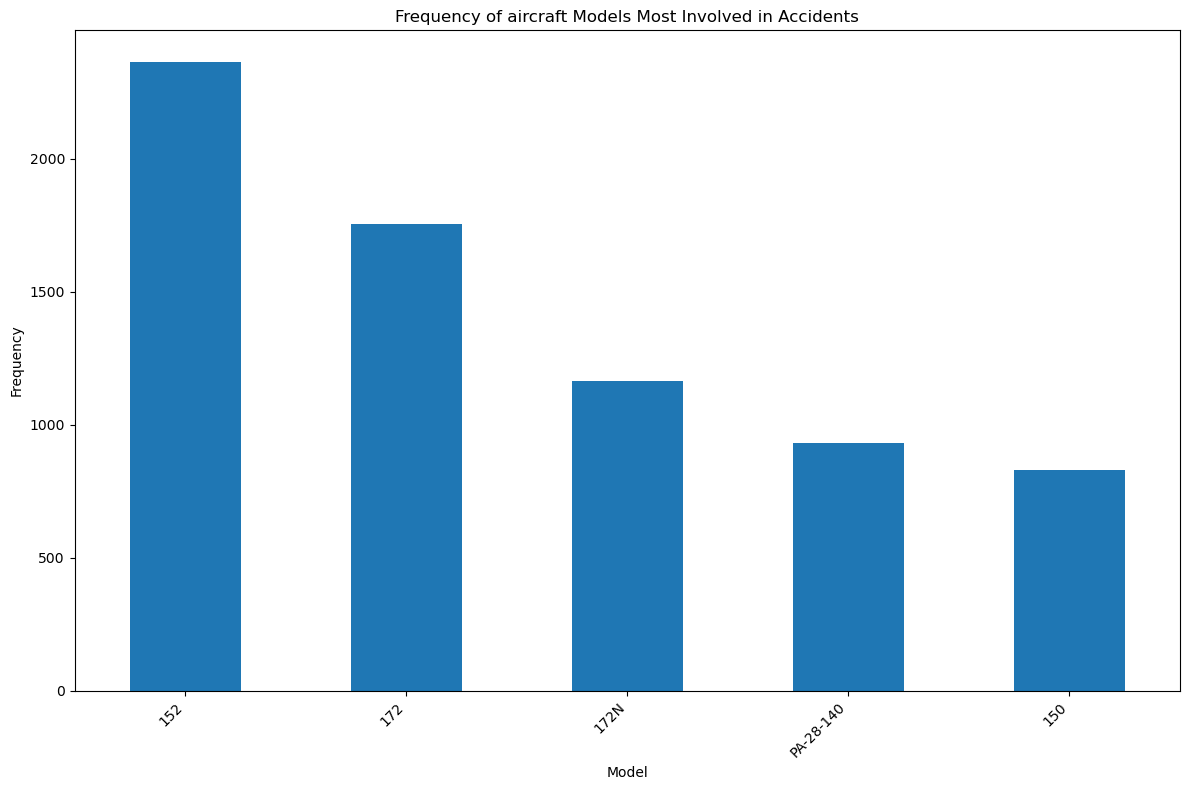

In [118]:
model_counts = aviation_data['Model'].value_counts()

# Select the top 5 most frequent models
top_5_models = model_counts.head(5)

# Plotting
plt.figure(figsize=(12, 8))
top_5_models.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.title('Frequency of aircraft Models Most Involved in Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

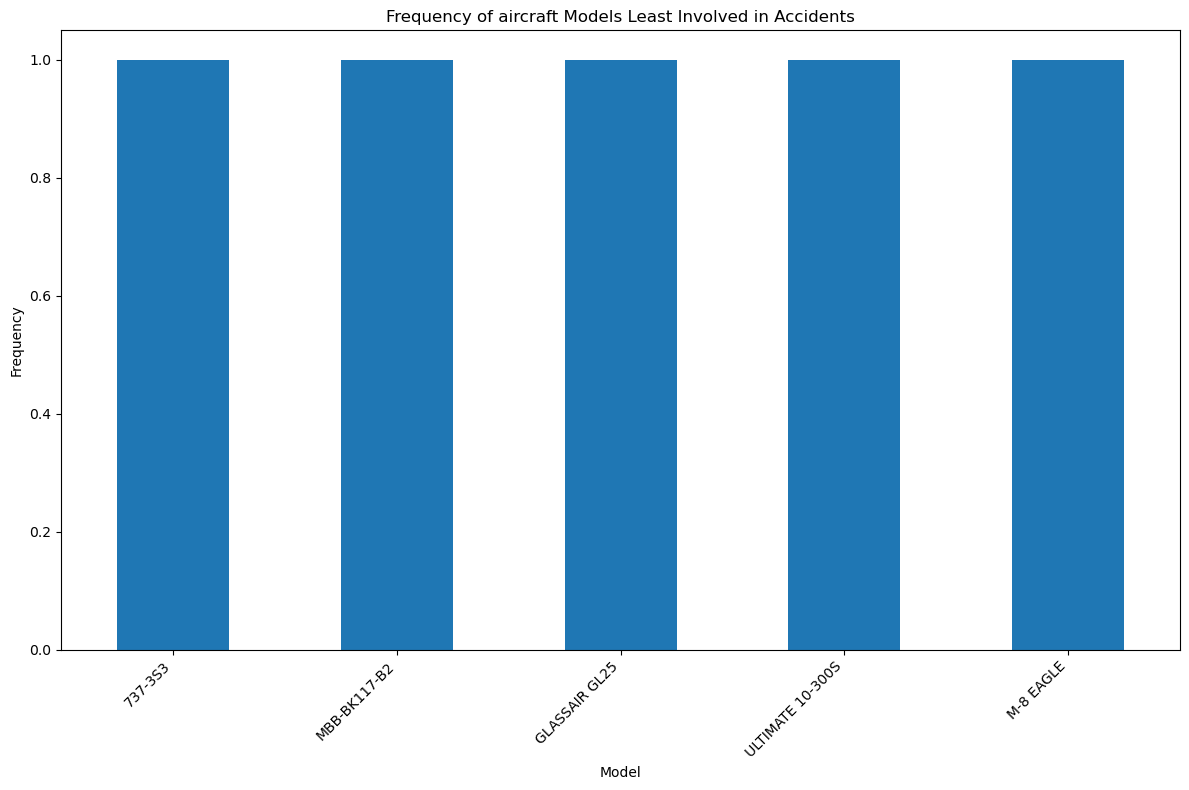

In [119]:
model_counts = aviation_data['Model'].value_counts()

# Select the bottom 5 least frequent models
bottom_5_models = model_counts.tail(5)

# Plotting
plt.figure(figsize=(12, 8))
bottom_5_models.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.title('Frequency of aircraft Models Least Involved in Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the bar plots above the Models  least involved in accidents are: GC-1-A, 737-3S3, MBB-BK117-B2, GLASSAIR GL25, M-8 EAGLE
While the Models Most Involved in accidents are: 152, 172, 150, 172N, PA-28-140 and 150. The frequency distribution on the least involved is more evenly spread while on the most involved 152 dominates the dataset in terms of frequency. During purchase of an aircraft, the models least involved in accidents are advisable.

b) A histogram to show the Number of Engines/Make against the frequency of accidents

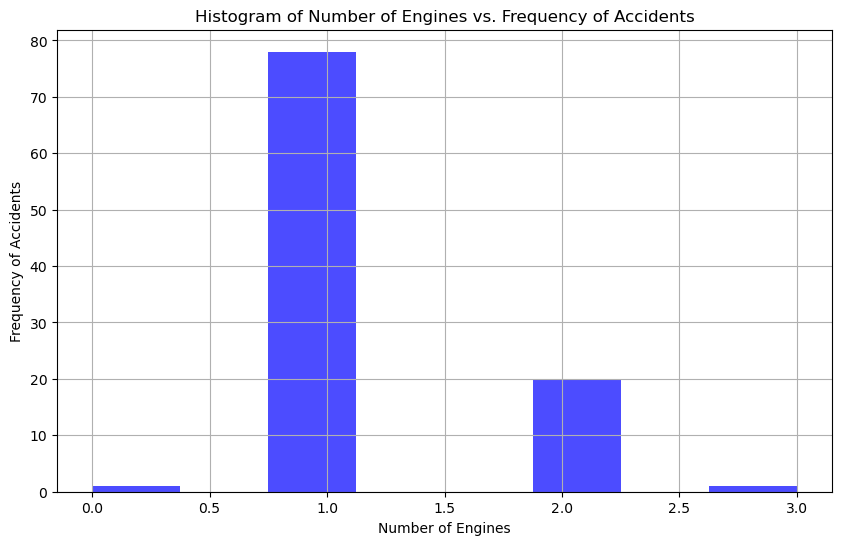

In [120]:
subset_data = aviation_data['Number.of.Engines'].head(100)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(subset_data, bins='auto', color='blue', alpha=0.7)
plt.xlabel('Number of Engines')
plt.ylabel('Frequency of Accidents')
plt.title('Histogram of Number of Engines vs. Frequency of Accidents')
plt.grid(True)
plt.show()

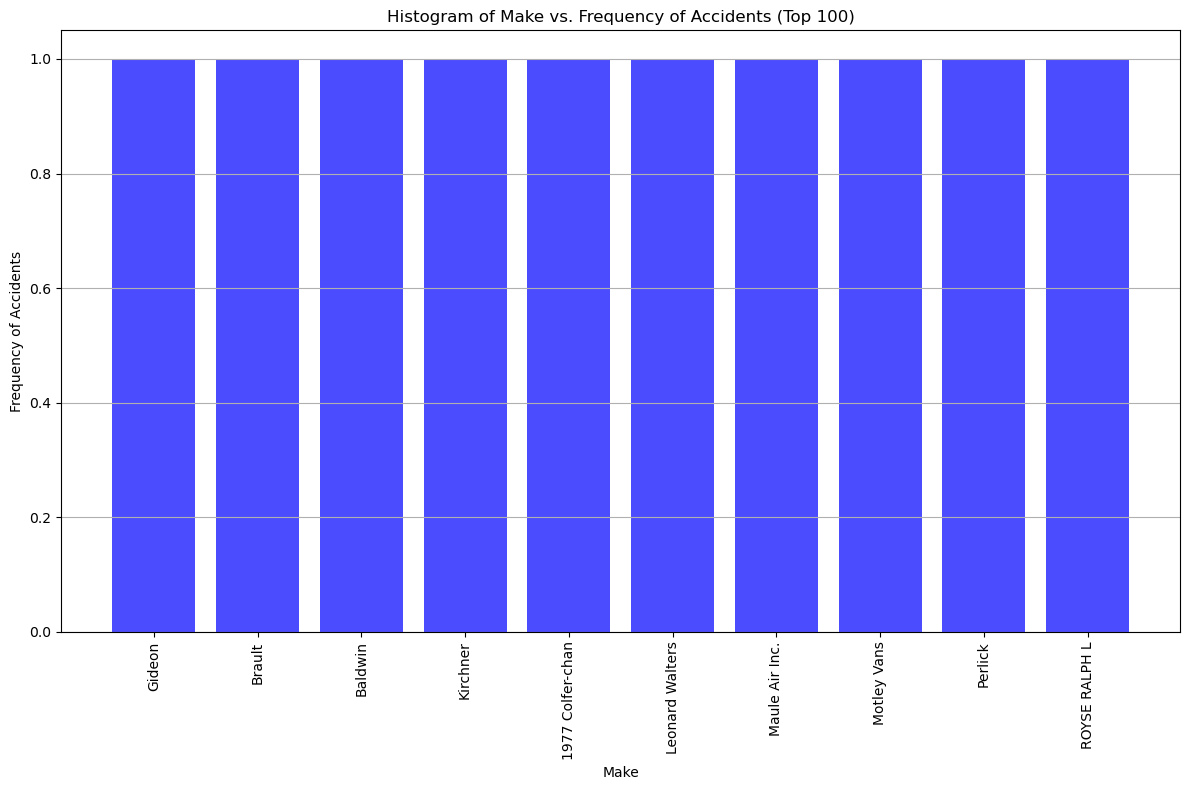

In [82]:
# Calculate the frequency of accidents per make
make_counts = aviation_data['Make'].value_counts().tail(10)

# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.bar(make_counts.index, make_counts.values, color='blue', alpha=0.7)
plt.xlabel('Make')
plt.ylabel('Frequency of Accidents')
plt.title('Histogram of Make vs. Frequency of Accidents (Top 100)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()
plt.show()

From the histograms above, an aircraft with 3 engines is more preferable and the makes to be considered would be Gideon, Brault,Kircher, 1977 Colfer-chan, Leonard Walters, Maule Air Inc., Moltey Vans, Perlick and ROYSE RALPH L.

2.Bivariate Analysis

Bivariate analysis involves the analysis of two variables simultaneously to explore the relationship between them. It helps in understanding how one variable behaves concerning another variable. 

a)Scatter plot between total number of injuries and the model of the aircraft to see if there is any correlation between the model and severity of the accident 


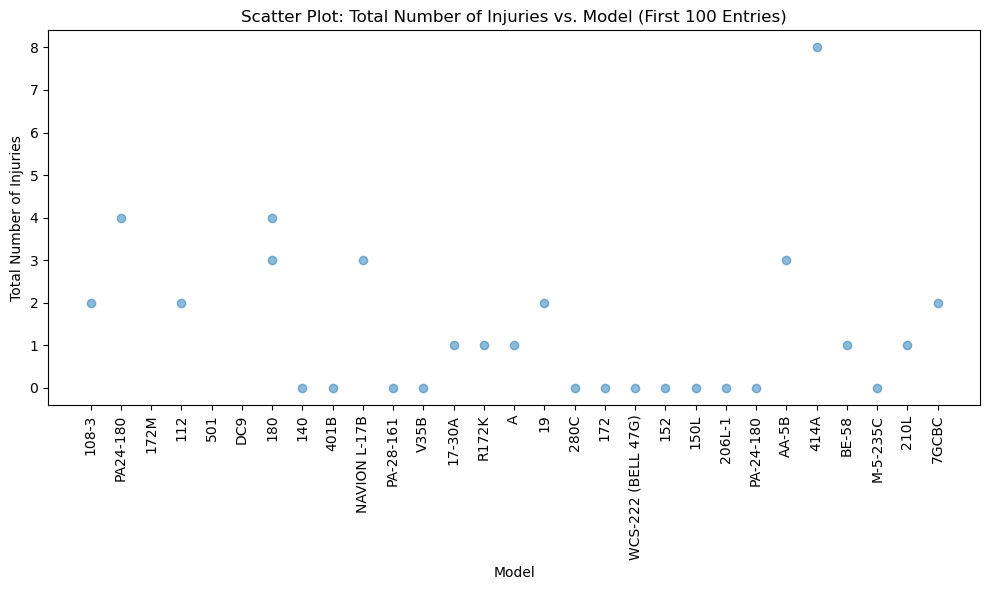

In [103]:
# Selecting the first 30 entries
subset_data = aviation_data.head(30)

# Adding the injuries
Total_injuries = aviation_data['Total.Fatal.Injuries'] + aviation_data['Total.Minor.Injuries'] + aviation_data['Total.Serious.Injuries']

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(subset_data['Model'], Total_injuries.head(30), alpha=0.5)
plt.xlabel('Model')
plt.ylabel('Total Number of Injuries')
plt.title('Scatter Plot: Total Number of Injuries vs. Model (First 100 Entries)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


The total number of injuries and the model have a negative correlation. This means that as the aircraft models become newer, the total number of people injured tends to decrease.

3.Multivariate Analysis

Multivariate Analysis involves multiple variables. This type of analysis allows researchers to understand the relationships between multiple variables simultaneously and to determine the effect of each variable on the outcome. 

c:\Users\debby\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\debby\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\debby\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\debby\anaconda3\envs\learn-env\lib\site-packages\seabo

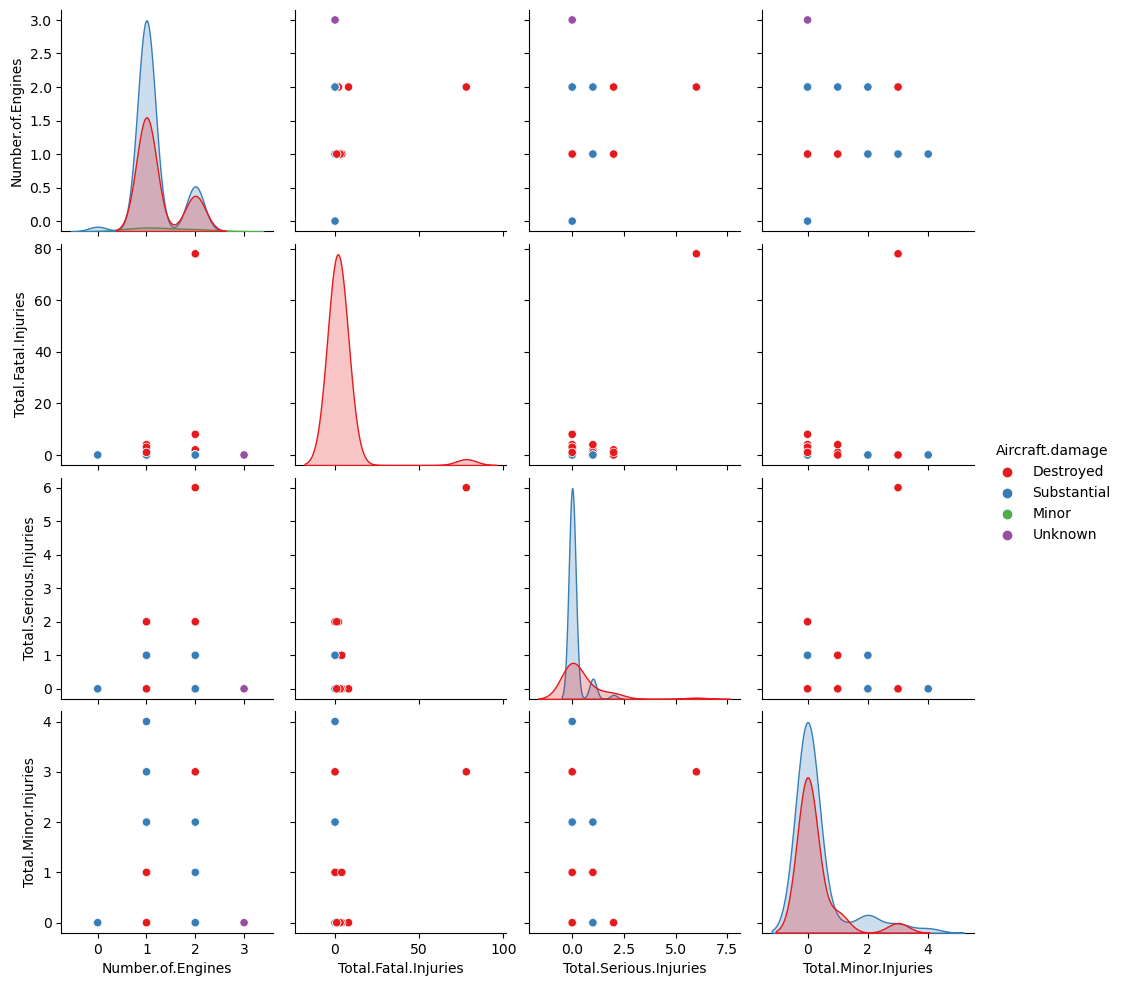

In [127]:


# Convert infinite values to NaN
aviation_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Selecting the first 100 rows
df_first_100 = aviation_data.head(100)

# Selecting columns of interest
columns_of_interest = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Aircraft.damage']
df_filtered = df_first_100[columns_of_interest]

# Creating the scatter plot matrix
sns.pairplot(df_filtered, hue='Aircraft.damage', palette='Set1')
plt.show()



The severity of the injuries increased as the level of damage increased

Summary

Based on the bar plots, the aircraft models least involved in accidents are GC-1-A, 737-3S3, MBB-BK117-B2, GLASSAIR GL25, and M-8 EAGLE. These models have a more evenly spread frequency distribution, suggesting they are less frequently involved in accidents.

The models most involved in accidents are 152, 172, 150, 172N, PA-28-140, and 150. Among these, the model 152 dominates the dataset in terms of frequency.

When purchasing an aircraft, it is advisable to consider models that are least involved in accidents. These models are less frequently associated with accidents, based on the data analyzed.

The histograms suggest that aircraft with 3 engines are more preferable. Makes to be considered include Gideon, Brault, Kircher, 1977 Colfer-chan, Leonard Walters, Maule Air Inc., Moltey Vans, Perlick, and ROYSE RALPH L.

There is a negative correlation observed between the total number of injuries and the model of the aircraft. This implies that as the aircraft models become newer, the total number of people injured tends to decrease.

The severity of injuries tends to increase as the level of aircraft damage increases. This relationship underscores the importance of maintaining aircraft in good condition to minimize the severity of injuries in case of accidents.

Conclusion

When selecting an aircraft for purchase, it is recommended to choose models that have been least involved in accidents based on the historical data analysis. Additionally, ensuring the aircraft is in good condition and has a higher number of engines may contribute to better safety outcomes. Maintaining newer models and keeping the aircraft in good condition can help reduce the severity of injuries in the event of an accident. Finally, newer models are preferable as thet often incorporate the latest technologies and design improvements. They may also come withbetter training programs for pilotsas well as updated safety procedures.